In [1]:
from copy import deepcopy

from util.explain import _preprocess, negation_atoms, _derivation_path, _dependency_assumption, explanation_graph
import networkx as nx

In [2]:

example_literal_mapping = dict(b=2, k=4, a=3, e=1, c=5, f=6)
a, b, c, e, f, k = example_literal_mapping['a'], example_literal_mapping['b'], example_literal_mapping['c'], \
                   example_literal_mapping['e'], example_literal_mapping['f'], example_literal_mapping['k']

example_program = {
    e: [dict()],
    b: [dict(positive=[], negative=[a])],
    k: [dict(positive=[e], negative=[b])],
    a: [dict(positive=[k], negative=[b])],
    c: [dict(positive=[a, b], negative=[]), dict(positive=[k], negative=[])],
    f: [dict(positive=[e], negative=[k, c])]
}
example_facts = {e}

example_answer_set = {b, f, e}

example_derivable_dict = {
    f: [{-k, -c, e}],
    b: [{-a}],
    -c: [{-k, -a}],
    -k: [{b}],
    -a: [{-k}, {b}],
    e: [{"T"}]}

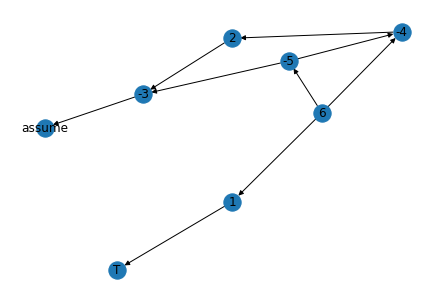

In [3]:
graph = explanation_graph(f, deepcopy(example_derivable_dict), {a}, deepcopy(example_answer_set))
assert graph is not None
nx.draw(graph, with_labels=True)

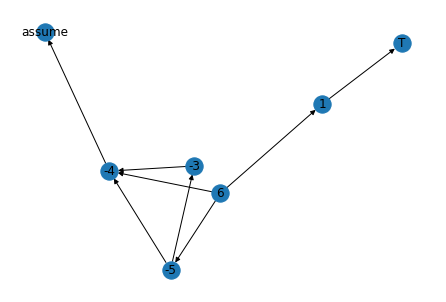

In [4]:
graph = explanation_graph(f, deepcopy(example_derivable_dict), {k}, deepcopy(example_answer_set))
assert graph is not None
nx.draw(graph, with_labels=True)